In [1]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams['image.cmap'] = 'gray'

In [2]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from scipy.misc import imresize
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils import np_utils, generic_utils
from keras.optimizers import Adam, SGD

import keras.backend as K
from layers import SpatialTransformer

batch_size = 128
nb_classes = 10
nb_epoch = 12

DIM = 60
mnist_cluttered = "datasets/mnist_cluttered_60x60_6distortions.npz"

/home/facundo/dev/experiments/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
data = np.load(mnist_cluttered)
X_train, y_train = data['x_train'], np.argmax(data['y_train'], axis=-1)
X_valid, y_valid = data['x_valid'], np.argmax(data['y_valid'], axis=-1)
X_test, y_test = data['x_test'], np.argmax(data['y_test'], axis=-1)
# reshape for convolutions
X_train = X_train.reshape((X_train.shape[0], DIM, DIM, 1))
X_valid = X_valid.reshape((X_valid.shape[0], DIM, DIM, 1))
X_test = X_test.reshape((X_test.shape[0], DIM, DIM, 1))

y_train = np_utils.to_categorical(y_train, nb_classes)
y_valid = np_utils.to_categorical(y_valid, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print("Train samples: {}".format(X_train.shape))
print("Validation samples: {}".format(X_valid.shape))
print("Test samples: {}".format(X_test.shape))


input_shape =  np.squeeze(X_train.shape[1:])
input_shape = (60,60,1)
print("Input shape:",input_shape)

Train samples: (50000, 60, 60, 1)
Validation samples: (10000, 60, 60, 1)
Test samples: (10000, 60, 60, 1)
Input shape: (60, 60, 1)


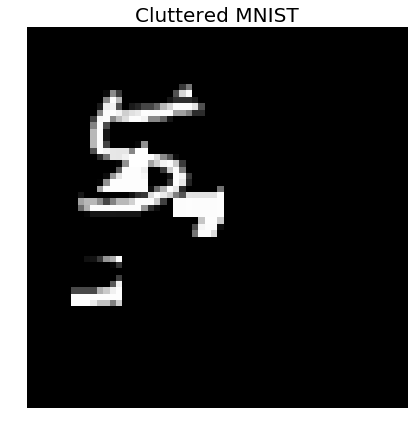

In [4]:


plt.figure(figsize=(7,7))
plt.imshow(X_train[101].reshape(DIM, DIM), cmap='gray', interpolation='none')
plt.title('Cluttered MNIST', fontsize=20)
plt.axis('off')
plt.show()



## Clasification Network

In [22]:

#LOCNET

# initial weights
b = np.zeros((2, 3), dtype='float32')
b[0, 0] = 1
b[1, 1] = 1
n=50
W = np.zeros((n, 6), dtype='float32')
weights = [W, b.flatten()]

locnet = Sequential()
locnet.add(Convolution2D(16, (5, 5), strides=(2,2),input_shape=input_shape))
model.add(layers.BatchNormaliz  ation())
locnet.add(Convolution2D(16, (5, 5)))
model.add(layers.BatchNormalization())
locnet.add(Convolution2D(32, (5, 5), strides=(2,2)))
model.add(layers.BatchNormalization())
locnet.add(Convolution2D(32, (5, 5)))
model.add(layers.BatchNormalization())

locnet.add(Flatten())
locnet.add(Dense(n))
locnet.add(Activation('relu'))
locnet.add(Dense(6, weights=weights))

### CLASIFICATION NETWORK

from layers import SpatialTransformer
from keras import layers

def old_network(model):
    model.add(Convolution2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))

    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

# model = Sequential()
# model.add(SpatialTransformer(localization_net=locnet, output_size=(32,32), input_shape=input_shape))
# old_network(model)
import models

model=models.lecun_stn(input_shape,nb_classes)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())

XX = model.input
YY = model.layers[0].output
F = K.function([XX], [YY])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spatial_transformer_7 (Spati (None, 60, 60, 1)         243894    
_________________________________________________________________
all_conv (Sequential)        (None, 10)                4415760   
Total params: 4,659,654
Trainable params: 4,657,990
Non-trainable params: 1,664
_________________________________________________________________
None


----------------------------------------
10000/10000 [==============================] - 5s 456us/step
Epoch: 0 | Valid: loss:1.8009480520248413 - accuracy:0.588| Test: loss:1.7883509742736816 - accuracy:0.5792


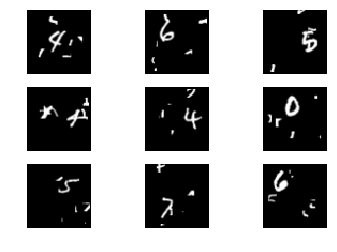

----------------------------------------
10000/10000 [==============================] - 5s 457us/step
Epoch: 1 | Valid: loss:0.5224082973718643 - accuracy:0.8356| Test: loss:0.5120653321743012 - accuracy:0.8414


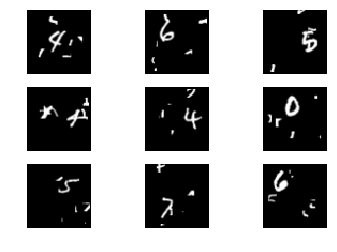

----------------------------------------
10000/10000 [==============================] - 5s 457us/step
Epoch: 2 | Valid: loss:0.31842567303180697 - accuracy:0.8971| Test: loss:0.3047423689007759 - accuracy:0.9031


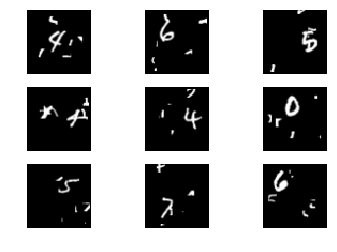

----------------------------------------
10000/10000 [==============================] - 5s 458us/step
Epoch: 3 | Valid: loss:0.2990611195087433 - accuracy:0.9153| Test: loss:0.28169538553357126 - accuracy:0.9189


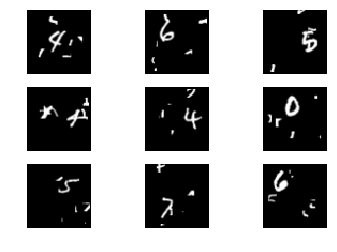

----------------------------------------
10000/10000 [==============================] - 5s 455us/step
Epoch: 4 | Valid: loss:0.2064615116119385 - accuracy:0.9412| Test: loss:0.18714736252576114 - accuracy:0.9445


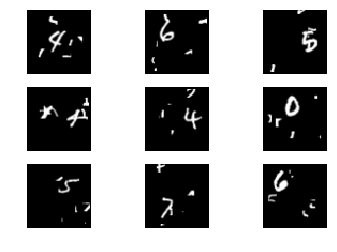

----------------------------------------
10000/10000 [==============================] - 5s 459us/step
Epoch: 5 | Valid: loss:0.1742519820444286 - accuracy:0.9474| Test: loss:0.1690964571002871 - accuracy:0.9497


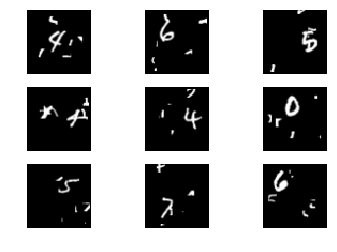

----------------------------------------
10000/10000 [==============================] - 5s 458us/step
Epoch: 6 | Valid: loss:0.132369910380058 - accuracy:0.9603| Test: loss:0.12683248636238276 - accuracy:0.9605


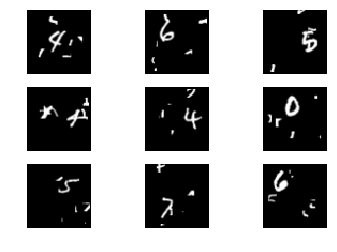

----------------------------------------
10000/10000 [==============================] - 5s 457us/step
Epoch: 7 | Valid: loss:0.12861338858511298 - accuracy:0.9643| Test: loss:0.12083703944999724 - accuracy:0.9637


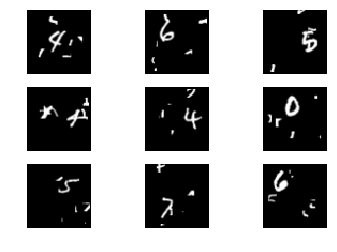

----------------------------------------
10000/10000 [==============================] - 5s 457us/step
Epoch: 8 | Valid: loss:0.12809136264901608 - accuracy:0.9648| Test: loss:0.11996379778776319 - accuracy:0.9642


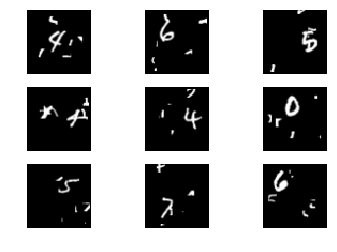

----------------------------------------
10000/10000 [==============================] - 5s 459us/step
Epoch: 9 | Valid: loss:0.1282786671541631 - accuracy:0.965| Test: loss:0.11986210066583007 - accuracy:0.9639


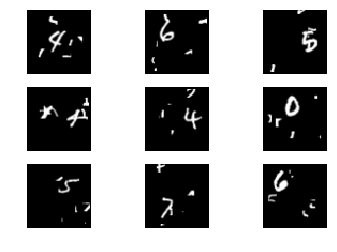

----------------------------------------
10000/10000 [==============================] - 5s 460us/step
Epoch: 10 | Valid: loss:0.12856052067372947 - accuracy:0.9649| Test: loss:0.11994635514700785 - accuracy:0.9646


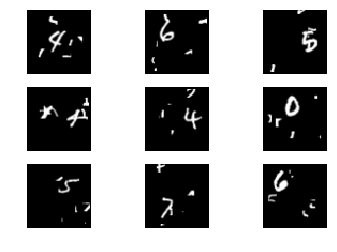

----------------------------------------
10000/10000 [==============================] - 5s 457us/step
Epoch: 11 | Valid: loss:0.12889822491668165 - accuracy:0.9649| Test: loss:0.1201036932548508 - accuracy:0.9648


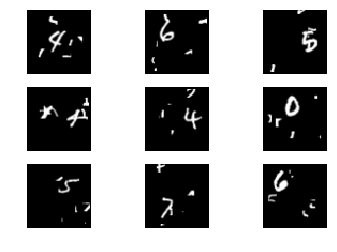

----------------------------------------
10000/10000 [==============================] - 5s 460us/step
Epoch: 12 | Valid: loss:0.12922085389206187 - accuracy:0.9652| Test: loss:0.12029724480826408 - accuracy:0.9651


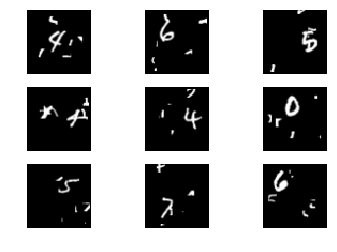

----------------------------------------
10000/10000 [==============================] - 5s 459us/step
Epoch: 13 | Valid: loss:0.12955943088382482 - accuracy:0.9657| Test: loss:0.12055162382437848 - accuracy:0.9651


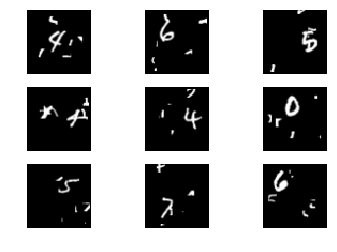

----------------------------------------
10000/10000 [==============================] - 5s 456us/step
Epoch: 14 | Valid: loss:0.12996531210606918 - accuracy:0.9657| Test: loss:0.12084303502282127 - accuracy:0.9654


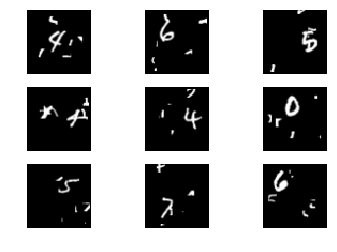

----------------------------------------
10000/10000 [==============================] - 5s 457us/step
Epoch: 15 | Valid: loss:0.13039228090560065 - accuracy:0.966| Test: loss:0.12116395683242008 - accuracy:0.9657


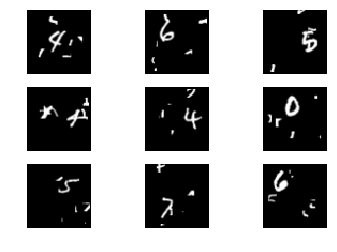

----------------------------------------
10000/10000 [==============================] - 5s 456us/step
Epoch: 16 | Valid: loss:0.13087218272574247 - accuracy:0.9657| Test: loss:0.12154229592615738 - accuracy:0.9659


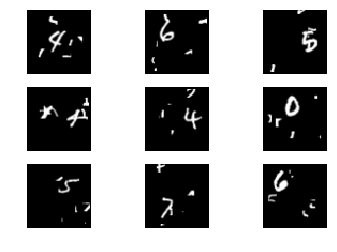

----------------------------------------
10000/10000 [==============================] - 5s 458us/step
Epoch: 17 | Valid: loss:0.13135360178831035 - accuracy:0.9659| Test: loss:0.1219344920902513 - accuracy:0.966


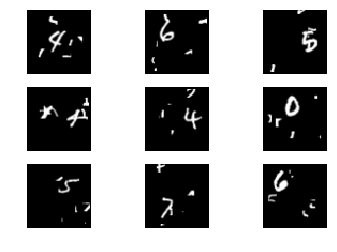

----------------------------------------
10000/10000 [==============================] - 5s 458us/step
Epoch: 18 | Valid: loss:0.1316900612075813 - accuracy:0.9657| Test: loss:0.12222321189981886 - accuracy:0.9662


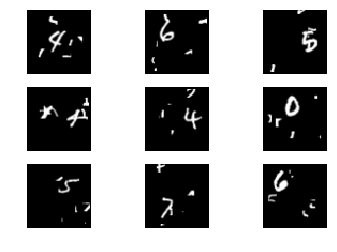

----------------------------------------
10000/10000 [==============================] - 5s 457us/step
Epoch: 19 | Valid: loss:0.13205976353702134 - accuracy:0.9658| Test: loss:0.12254451835667715 - accuracy:0.9662


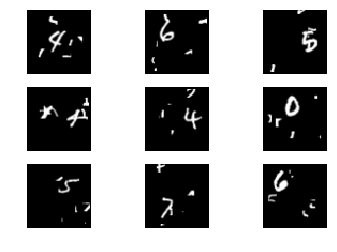

In [23]:
nb_epochs = 20 # you probably want to go longer than this
batch_size = 256
fig = plt.figure()
try:
    for e in range(nb_epochs):
        print('-'*40)
        progbar = generic_utils.Progbar(X_train.shape[0])
        for b in range(150):
            #print(b)
            f = b * batch_size
            l = (b+1) * batch_size
            X_batch = X_train[f:l].astype('float32')
            y_batch = y_train[f:l].astype('float32')
            loss,accuracy = model.train_on_batch(X_batch, y_batch)
            #print(loss)
            progbar.add(X_batch.shape[0], values=[("train loss", loss),("accuracy",accuracy)])
        scorev, accuracyv = model.evaluate(X_valid, y_valid, verbose=1)
        scoret, accuracyt = model.evaluate(X_test, y_test, verbose=1)
        print('Epoch: {0} | Valid: loss:{1} - accuracy:{2}| Test: loss:{3} - accuracy:{4}'.format(e, scorev, accuracyv, scoret,accuracyt))
        
        if e % 1 == 0:
            Xresult = F([X_batch[:9]])
            plt.clf()
            for i in range(9):
                plt.subplot(3, 3, i+1)
                image = np.squeeze(Xresult[0][i])
                plt.imshow(image, cmap='gray')
                plt.axis('off')
            fig.canvas.draw()
            plt.show()
        
except KeyboardInterrupt:
    pass


## Visualizing STN

In [26]:


Xaug = X_train[:9]
Xresult = F([Xaug.astype('float32')])



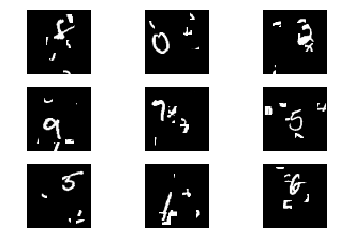

In [27]:
# input
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(Xaug[i]), cmap='gray')
    plt.axis('off')

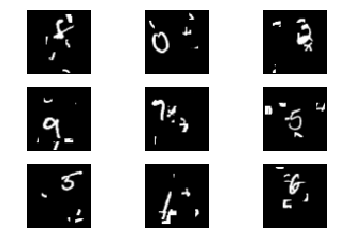

In [28]:
# output
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(Xresult[0][i]), cmap='gray')
    plt.axis('off')